In [52]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
!ls /content/movielens


allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [54]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt


In [55]:
train = pd.read_csv("/content/movielens/ua.base",sep="\t",
            names=["user","item","rating","timestamp"])

test = pd.read_csv("/content/movielens/ua.test",sep="\t",
            names=["user","item","rating","timestamp"])


In [56]:
users = torch.LongTensor(train['user'])
items = torch.LongTensor(train['item'])
ratings = torch.FloatTensor(train['rating'])

users_test = torch.LongTensor(test['user'])
items_test = torch.LongTensor(test['item'])
ratings_test = torch.FloatTensor(test['rating'])

In [57]:
rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad=True)
Q = torch.randn(num_items, rank, requires_grad=True)

lambda_P = 0.0001
lambda_Q = 0.0001

optimizer = torch.optim.Adam([P,Q], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypo = (P[users] * Q[items]).sum(dim=1)
  mse = F.mse_loss(hypo, ratings)
  cost = mse + lambda_P*(P**2).sum() + lambda_Q*(Q**2).sum()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(mse.item())

    hypo_test = (P[users_test] * Q[items_test]).sum(dim=1)
    mse_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(mse_test.item())

    if epoch % 100 == 0:
      print(f"epoch :{epoch}, cost: {mse.item()}, cost_test: {mse_test.item()}")


epoch :0, cost: 23.66753387451172, cost_test: 21.692195892333984
epoch :100, cost: 0.7104047536849976, cost_test: 1.0677436590194702
epoch :200, cost: 0.6445252299308777, cost_test: 1.0561186075210571
epoch :300, cost: 0.6320115923881531, cost_test: 1.0570310354232788
epoch :400, cost: 0.6289214491844177, cost_test: 1.0559113025665283
epoch :500, cost: 0.6277568340301514, cost_test: 1.0551081895828247
epoch :600, cost: 0.6270105838775635, cost_test: 1.0548549890518188
epoch :700, cost: 0.6265696287155151, cost_test: 1.0545710325241089
epoch :800, cost: 0.6263159513473511, cost_test: 1.0541002750396729
epoch :900, cost: 0.6261574625968933, cost_test: 1.0537492036819458
epoch :1000, cost: 0.6260524392127991, cost_test: 1.053823471069336


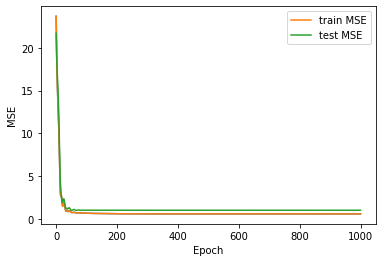

In [58]:
plt.plot(X,Y)
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.plot(X,Y,label="train MSE")
plt.plot(X,Y_test,label="test MSE")
plt.legend()


plt.show()

In [59]:
rank = 10
num_users = users.max() + 1
num_items = items.max() + 1

P = torch.randn(num_users, rank, requires_grad=True)
Q = torch.randn(num_items, rank, requires_grad=True)

bias_user = torch.randn(num_users,requires_grad=True)
bias_item = torch.randn(num_items,requires_grad=True)
mean = (ratings.sum()/len(ratings)).item()

lambda_P = 0.0001
lambda_Q = 0.0001
lambda_BU = 0.0001
lambda_BI = 0.0001

optimizer = torch.optim.Adam([P,Q, bias_user, bias_item], lr=0.1)

X = []
Y = []
Y_test = []
for epoch in range(1001):
  hypo = (P[users] * Q[items]).sum(dim=1) + bias_user[users] + bias_item[items] + mean
  mse = F.mse_loss(hypo, ratings)
  cost = mse + lambda_P*(P**2).sum() + lambda_Q*(Q**2).sum() + \
           lambda_BU * (bias_user**2).sum() + lambda_BI * (bias_item**2).sum()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch)
    Y.append(mse.item())


    hypo_test = (P[users_test] * Q[items_test]).sum(dim=1)+\
                     bias_user[users_test] + bias_item[items_test] + mean
    mse_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(mse_test.item())

    if epoch % 100 == 0:
      print(f"epoch :{epoch}, cost: {mse.item()}, cost_test: {mse_test.item()}")


epoch :0, cost: 13.287676811218262, cost_test: 10.276268005371094
epoch :100, cost: 0.612516462802887, cost_test: 0.8803497552871704
epoch :200, cost: 0.5810884833335876, cost_test: 0.8686655759811401
epoch :300, cost: 0.5752583742141724, cost_test: 0.8665206432342529
epoch :400, cost: 0.5735230445861816, cost_test: 0.8676807284355164
epoch :500, cost: 0.5730118155479431, cost_test: 0.8678644895553589
epoch :600, cost: 0.5727591514587402, cost_test: 0.867309033870697
epoch :700, cost: 0.5726228952407837, cost_test: 0.8670081496238708
epoch :800, cost: 0.5725691914558411, cost_test: 0.8670395612716675
epoch :900, cost: 0.572544276714325, cost_test: 0.8671042323112488
epoch :1000, cost: 0.5725388526916504, cost_test: 0.867152214050293


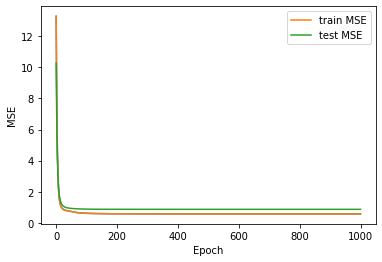

In [60]:
plt.plot(X,Y)
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.plot(X,Y,label="train MSE")
plt.plot(X,Y_test,label="test MSE")
plt.legend()


plt.show()